In [2]:

import sys

# Add the parent directory to the Python path
sys.path.append("synderm/synderm/")

from torch.utils.data import Dataset
from torchvision import transforms
from pathlib import Path
from PIL import Image
import pandas as pd
import os

In [3]:
class CustomDataset(Dataset):
    def __init__(self, dataset_dir, split="train"):
        self.dataset_dir = Path(dataset_dir)
        self.image_paths = []
        self.labels = []
        self.split = split

        # Walk through class folders
        data_dir = self.dataset_dir / self.split
        for class_name in os.listdir(data_dir):
            class_dir = data_dir / class_name
            if not class_dir.is_dir():
                continue
                
            # Get all png images in this class folder
            for img_name in os.listdir(class_dir):
                if img_name.lower().endswith('.png'):
                    self.image_paths.append(class_dir / img_name)
                    self.labels.append(class_name)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Load and convert image to RGB
        image = Image.open(image_path).convert('RGB')
        image_name = image_path.stem

        return {"id": image_name, "image": image, "label": label}

In [18]:
class SimpleFitzDataset(Dataset):
    def __init__(self, dataset_dir, fitz_path='fitzpatrick17k_10label_clean_training.csv'):
        self.class_names = [
            "allergic-contact-dermatitis",
            "basal-cell-carcinoma", 
            "folliculitis",
            "lichen-planus",
            "lupus-erythematosus",
            "neutrophilic-dermatoses",
            "photodermatoses",
            "psoriasis",
            "sarcoidosis",
            "squamous-cell-carcinoma",
        ]

        self.dataset_dir = Path(dataset_dir)

        self.data_images_root = self.dataset_dir / 'finalfitz17k'
        csv_file = self.dataset_dir / fitz_path
        print(f'Using csv file: {csv_file}')

        self.data_df = pd.read_csv(csv_file)

        # Filter to only include entries with labels in class_names
        self.data_df = self.data_df[self.data_df['label'].isin(self.class_names)]
        self.num_instance_images = len(self.data_df)

    def __len__(self):
        return self.data_df.shape[0]

    def __getitem__(self, index):
        example = {}

        entry = self.data_df.iloc[index]
        example['id'] = entry['md5hash']
        example['label'] = entry['label']

        filename = f"{entry['md5hash']}.jpg"

        instance_image_path = self.data_images_root / filename
        example["image"] = Image.open(instance_image_path).convert('RGB')

        return example

In [19]:
test = CustomDataset(dataset_dir="sample_dataset", split="val")

In [21]:
test_fitz = SimpleFitzDataset(dataset_dir="/n/data1/hms/dbmi/manrai/derm/Fitzpatrick17k")

Using csv file: /n/data1/hms/dbmi/manrai/derm/Fitzpatrick17k/fitzpatrick17k_10label_clean_training.csv


Image ID: 0001, Image Label: allergic-contact-dermatitis


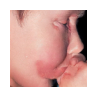

In [22]:
import matplotlib.pyplot as plt

for item in test:
    print(f"Image ID: {item['id']}, Image Label: {item['label']}")
    img = item["image"]
    plt.figure(figsize=(1, 1))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    break

Image 2 - ID: a39ec3b1f22c08a421fa20535e037bba, Label: psoriasis


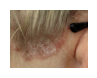

In [25]:
import matplotlib.pyplot as plt
# Get image by index
idx = 2
item = test_fitz[idx]
print(f"Image {idx} - ID: {item['id']}, Label: {item['label']}")
img = item["image"]
plt.figure(figsize=(1, 1))
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
len(test_fitz)

1333

In [41]:
len(test_fitz.labels)

0

In [24]:
len(test.image_paths)

320